In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [52]:
# Sets figure size
plt.rcParams["figure.figsize"] = (20,15)

In [53]:
# Reads in the dodgers data file
dodgers = pd.read_csv(r'dodgers-2022.csv')

In [54]:
# Displays the first five rows
dodgers.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [55]:
# Converts categorical variables to 1 and 0 variables
dodgers_transform = pd.get_dummies(dodgers, dtype = int)

In [56]:
# Displays the newly transformed variables
dodgers_transform.head()

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,...,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
0,10,56000,67,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,11,29729,58,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2,12,28328,57,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,13,31601,54,1,0,0,0,0,0,0,...,0,1,1,0,1,0,0,1,1,0
4,14,46549,57,1,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [57]:
# Creates the X features for analysis
X = dodgers_transform.drop(('attend'), axis = 1)

In [58]:
# Displays the first five rows
X.head()

,day,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,day_of_week_Friday,...,day_night_Day,day_night_Night,cap_NO,cap_YES,shirt_NO,shirt_YES,fireworks_NO,fireworks_YES,bobblehead_NO,bobblehead_YES
0,10,67,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
1,11,58,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
2,12,57,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,13,54,1,0,0,0,0,0,0,1,...,0,1,1,0,1,0,0,1,1,0
4,14,57,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0


In [59]:
# Creates the target
y = dodgers_transform['attend']

In [60]:
# Displays the first five rows
y.head()

0    56000
1    29729
2    28328
3    31601
4    46549
Name: attend, dtype: int64

In [61]:
# Splits data for model testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=10)                                                                                                     

In [62]:
# Prints the dimensions of all the features
print("X_train features:" , X_train.shape)
print("X_test:", X_test.shape)
print("Y_train features:", y_train.shape)
print("y_test features:", y_test.shape)


X_train features: (64, 45)
X_test: (17, 45)
Y_train features: (64,)
y_test features: (17,)


In [63]:
# Creates linear regression object
lm = LinearRegression()

In [64]:
# Fits the data to the model
model_lm = lm.fit(X_train, y_train)

In [65]:
# Creates a prediction object
pred_lm = model_lm.predict(X_test)

In [66]:
# Tests the data
r_2_lm = round(r2_score(y_test, pred_lm),3)

In [67]:
# Prints the R-Squared result
print(" R-Squared Score is:", r_2_lm)

 R-Squared Score is: -0.074


In [68]:
# Creates a copy of the training and testing data
X_train_v1, X_test_v1, y_train_v1, y_test_v1=  X_train.copy(), X_test.copy(), y_train.copy(), y_test.copy()

In [69]:
print("X_train_v1 features:" , X_train_v1.shape)
print("X_tes_v1t:", X_test_v1.shape)
print("Y_train_v1 features:", y_train_v1.shape)
print("y_test_v1 features:", y_test_v1.shape)

X_train_v1 features: (64, 45)
X_tes_v1t: (17, 45)
Y_train_v1 features: (64,)
y_test_v1 features: (17,)


In [ ]:
X_train_v1.var(axis=0)

In [71]:
scaler = MinMaxScaler()

In [72]:
X_train_v1_scaled = scaler.fit_transform(X_train_v1)

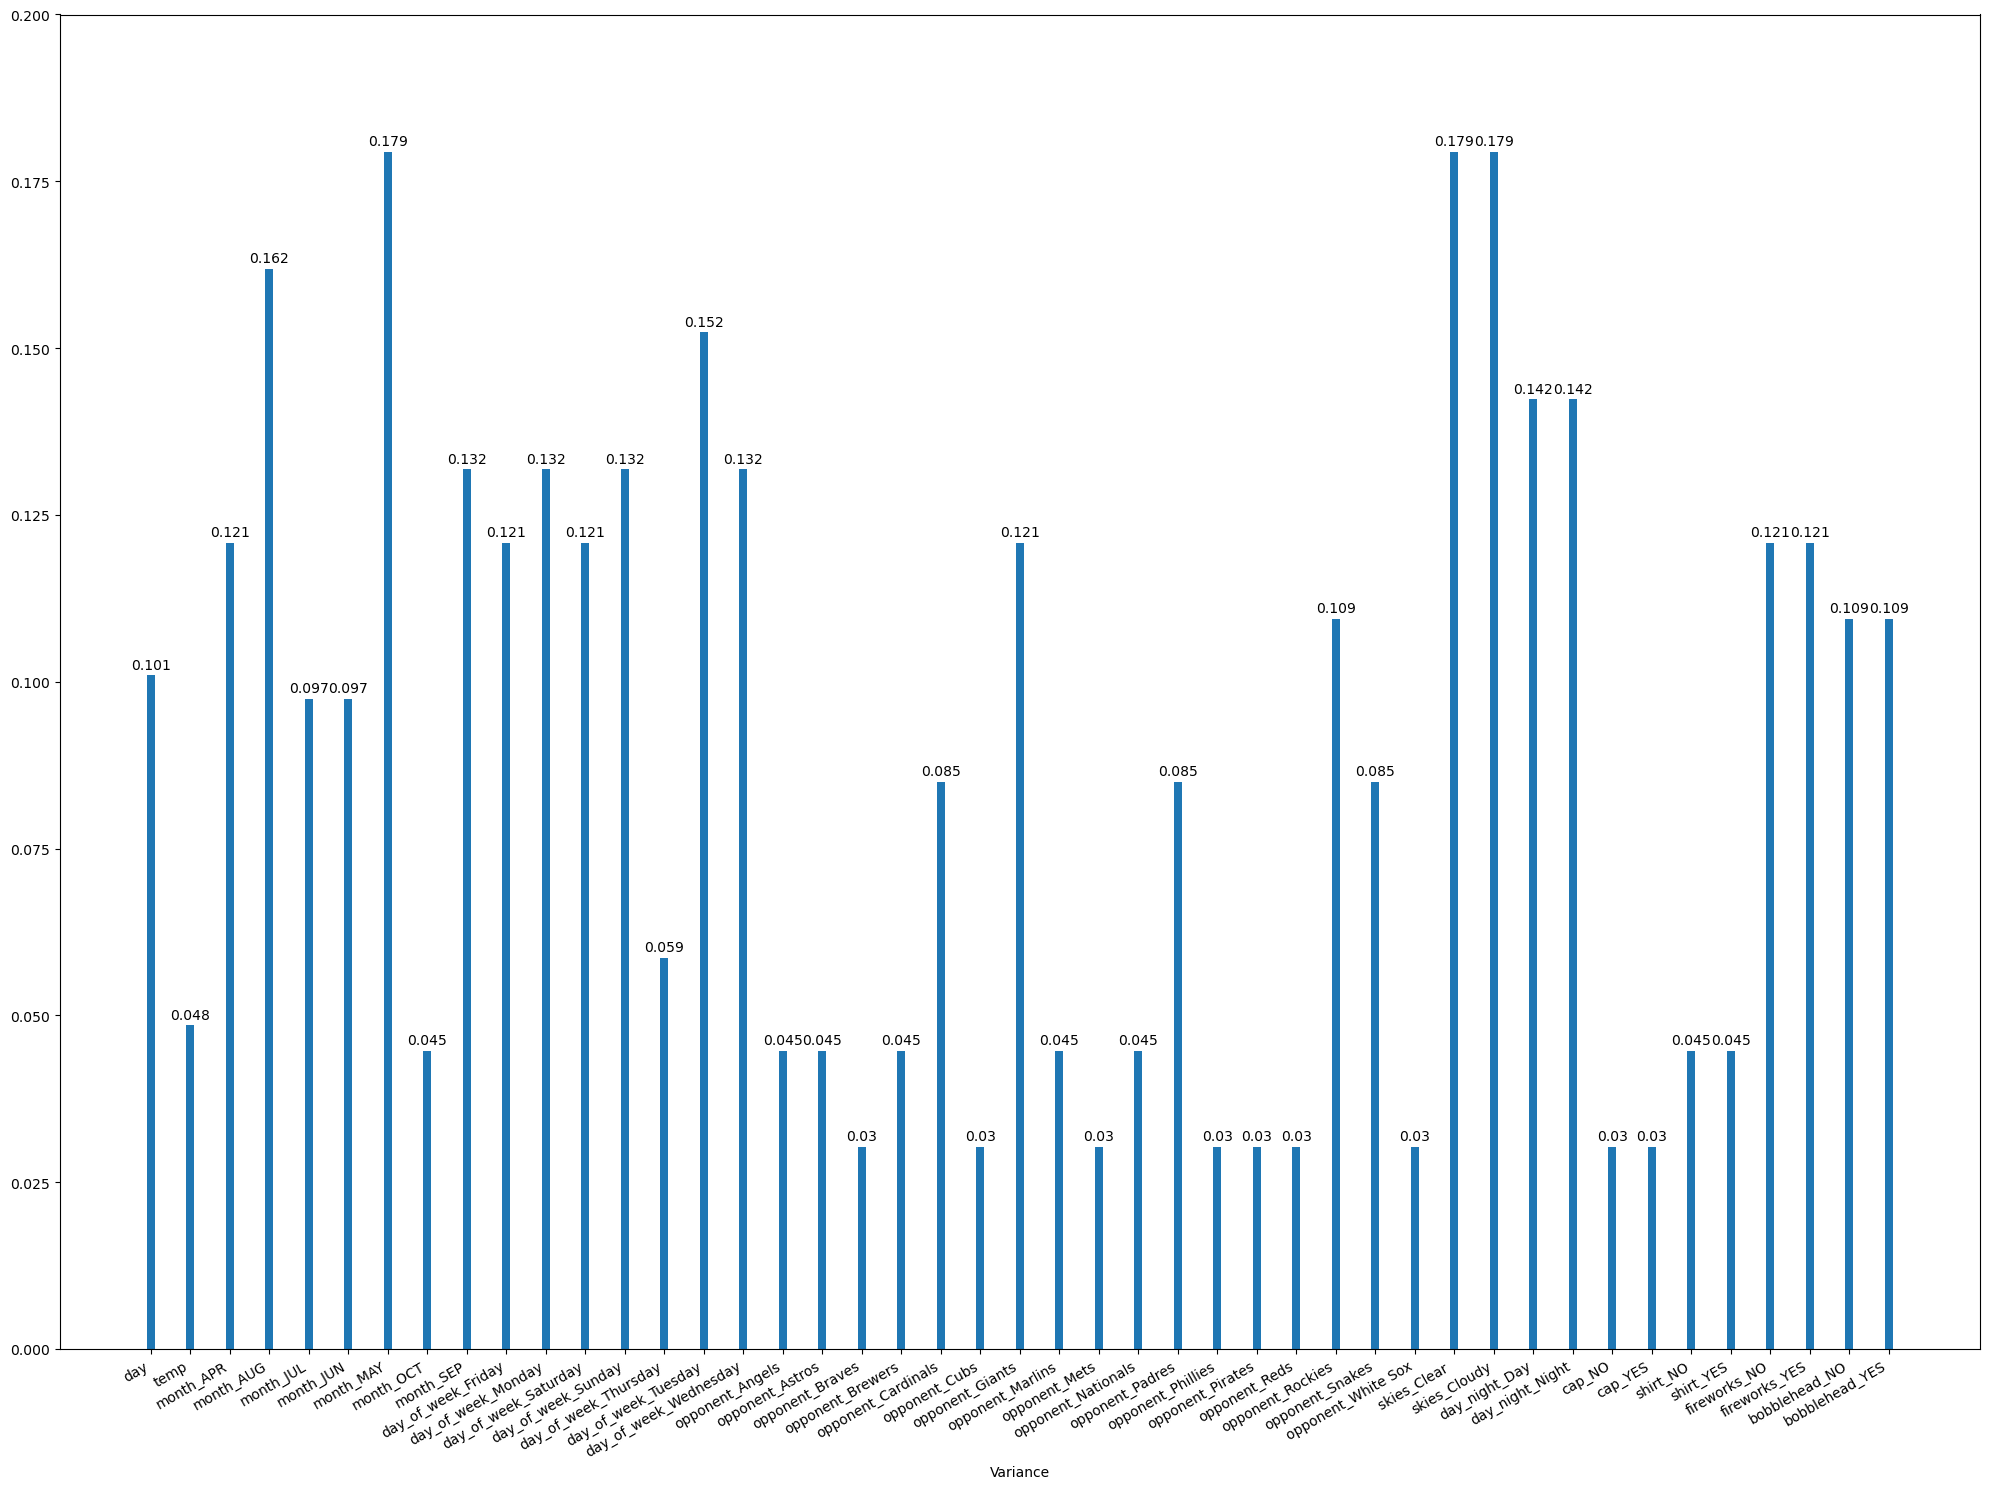

In [76]:
fig, ax = plt.subplots()

x = X.columns
y = X_train_v1_scaled.var(axis=0)

ax.bar(x, y, width=0.2)
ax.set_xlabel('Features')
ax.set_xlabel('Variance')
ax.set_ylim(0, 0.2)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.001, s=str(round(value, 3)), ha='center')
    
fig.autofmt_xdate()
plt.tight_layout()

In [78]:

sel_X_train = X_train_v1.drop(['temp', 'opponent_Angels', 'opponent_Astros', 'opponent_Braves', 'opponent_Brewers',
                            'opponent_Cardinals', 'opponent_Cubs', 'opponent_Giants', 'opponent_Marlins', 'opponent_Mets',
                            'opponent_Nationals', 'opponent_Padres', 'opponent_Phillies','opponent_Pirates', 
                            'opponent_Reds', 'opponent_Rockies','opponent_Snakes', 'opponent_White Sox', 'cap_NO', 
                            'cap_YES' ], axis=1)


In [79]:
sel_X_test = X_test_v1.drop(['temp', 'opponent_Angels', 'opponent_Astros', 'opponent_Braves', 'opponent_Brewers',
                            'opponent_Cardinals', 'opponent_Cubs', 'opponent_Giants', 'opponent_Marlins', 'opponent_Mets',
                            'opponent_Nationals', 'opponent_Padres', 'opponent_Phillies','opponent_Pirates', 
                            'opponent_Reds', 'opponent_Rockies','opponent_Snakes', 'opponent_White Sox', 'cap_NO', 
                            'cap_YES' ], axis=1)

In [80]:
model_lm_1 = lm.fit(sel_X_train, y_train_v1)

In [81]:
sel_pred = model_lm_1.predict(sel_X_test)

In [83]:
sel_r2 = round(r2_score(y_test, sel_pred),3)

In [85]:
print("New R-Squared:", sel_r2 )

New R-Squared: 0.382


In [88]:
X_train_v1.columns

Index(['day', 'temp', 'month_APR', 'month_AUG', 'month_JUL', 'month_JUN',
       'month_MAY', 'month_OCT', 'month_SEP', 'day_of_week_Friday',
       'day_of_week_Monday', 'day_of_week_Saturday', 'day_of_week_Sunday',
       'day_of_week_Thursday', 'day_of_week_Tuesday', 'day_of_week_Wednesday',
       'opponent_Angels', 'opponent_Astros', 'opponent_Braves',
       'opponent_Brewers', 'opponent_Cardinals', 'opponent_Cubs',
       'opponent_Giants', 'opponent_Marlins', 'opponent_Mets',
       'opponent_Nationals', 'opponent_Padres', 'opponent_Phillies',
       'opponent_Pirates', 'opponent_Reds', 'opponent_Rockies',
       'opponent_Snakes', 'opponent_White Sox', 'skies_Clear ', 'skies_Cloudy',
       'day_night_Day', 'day_night_Night', 'cap_NO', 'cap_YES', 'shirt_NO',
       'shirt_YES', 'fireworks_NO', 'fireworks_YES', 'bobblehead_NO',
       'bobblehead_YES'],
      dtype='object')

In [89]:
sel_X_train_1 = X_train_v1.drop(['temp','month_OCT', 'day_of_week_Thursday', 'opponent_Angels', 'opponent_Astros',
                                'opponent_Braves', 'opponent_Brewers','opponent_Cubs', 'opponent_Marlins', 'opponent_Mets',
                                'opponent_Nationals', 'opponent_Phillies','opponent_Pirates', 'opponent_Reds',
                                'opponent_White Sox', 'cap_NO', 'cap_YES', 'shirt_NO', 'shirt_YES'], axis=1)

In [90]:
sel_X_test_1 = X_test_v1.drop(['temp','month_OCT', 'day_of_week_Thursday', 'opponent_Angels', 'opponent_Astros',
                                'opponent_Braves', 'opponent_Brewers','opponent_Cubs', 'opponent_Marlins', 'opponent_Mets',
                                'opponent_Nationals', 'opponent_Phillies','opponent_Pirates', 'opponent_Reds',
                                'opponent_White Sox', 'cap_NO', 'cap_YES', 'shirt_NO', 'shirt_YES'], axis=1)

In [91]:
model_lm_2 = lm.fit(sel_X_train_1, y_train_v1)

In [92]:
sel_pred_1 = model_lm_2.predict(sel_X_test_1)

In [93]:
sel_r2_1 = round(r2_score(y_test_v1, sel_pred_1), 3)
print("R-Squared Third Model:", sel_r2_1)

R-Squared Third Model: 0.256
